In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

csv = pd.read_csv('notas.csv')

notas = pd.read_csv('https://raw.githubusercontent.com/celsocrivelaro/simple-datasets/main/notas-estudantes.csv')
#notas = notas.to_csv('notas.csv')



In [208]:
#armazenando colunas de notas em array para usar posteriormente esses sao os x1 e x2 da sigmoide
notas1 = notas.nota_1
notas2 = notas.nota_2
results = notas.resultado

In [209]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (notas['resultado'] == 0)
    pos = (notas['resultado'] == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

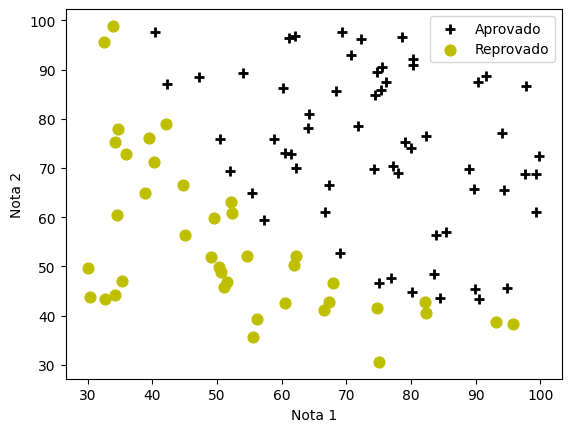

In [210]:
plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')

In [211]:
#funçao sigmoidal usada para prever os valores de Y
def sigmoide(x1,x2,a,b,c):
  sig =  1.0 / (1 + (np.exp(-(a*x1+b*x2 +c))))
  return sig

In [212]:
#função do calculo de erro/perdas
def crossEntropy(N, sig, y):
    logLoss =  -(np.sum(y*np.log(sig) + (1-y)*np.log(1-sig)))
    return logLoss/N


In [213]:
# Método de aprendizado Gradient Descent
# Hiperparâmetros iteracoes, alfa, limite_parada/epsilon
def gradDescent(x1, x2, y, iteraçoes = 10000, alfa = 1e-6, epsilon = 1e-6):
    count = 0
    a = 0.1
    b = 0.01
    c = 2
    n = len(y)

    perdas = []
    perdasm = []
    var_a = []
    var_b = []
    perda_anterior = float('inf')
    for i in range(iteraçoes):    
        #prediçao do dado com coeficientes atuais
        sig = sigmoide(x1, x2, a, b, c)
        #calculo de erros/perdas
        loss = crossEntropy(n, sig, y)
        count += 1
        if abs(perda_anterior - loss) <= epsilon:
            print(f"Coeficientes {count} iterações")
            return a, b, c, perdas, var_a, var_b,  count
		
        perda_anterior = loss

        perdas.append(loss)
        perdasm.append(loss/n)
        var_a.append(a)
        var_b.append(b)
        
        #gradiente
        derivada_a = (1/n) * np.sum(x1 * (sig - y))
        derivada_b = (1/n) * np.sum(x2 * (sig - y))
        derivada_c = (1/n) * np.sum(sig - y)
        
        #atualizaçao dos coeficientes
        a = a - (alfa * derivada_a)
        b = b - (alfa * derivada_b)
        c = c - (alfa * derivada_c)
    
    print(f"Coeficientes {count}")
    return a, b, c, perdas, var_a, var_b,  count


In [214]:
perdas, var_a, var_b= [], [], []
a, b, c, perdas, var_a, var_b,  iters = gradDescent(notas1, notas2, results)

a,b,c

Coeficientes 10000


(0.022895903357215964, -0.03923367444146789, 1.9982420739257158)

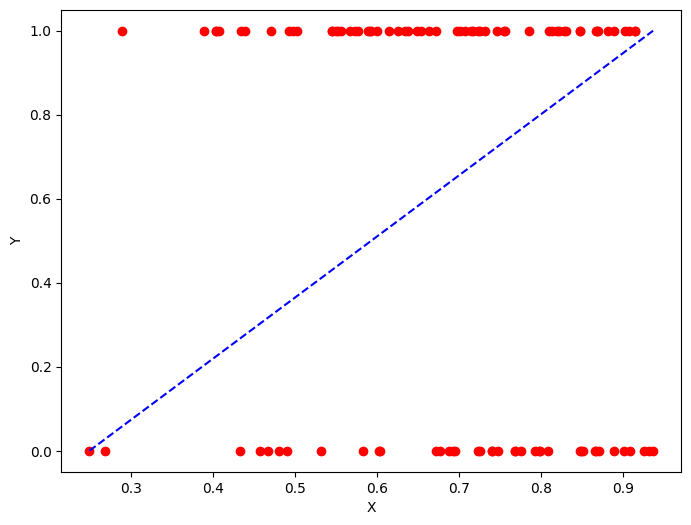

In [222]:
Y_pred = sigmoide(notas1, notas2, a, b, c)
 
# Plotando os mesmos dados com a linha
plt.figure(figsize = (8,6))
plt.scatter(Y_pred, results, marker='o', color='red')
plt.plot([min(Y_pred), max(Y_pred)], [min(results), max(results)], color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Text(0.5, 0, 'Perdas')

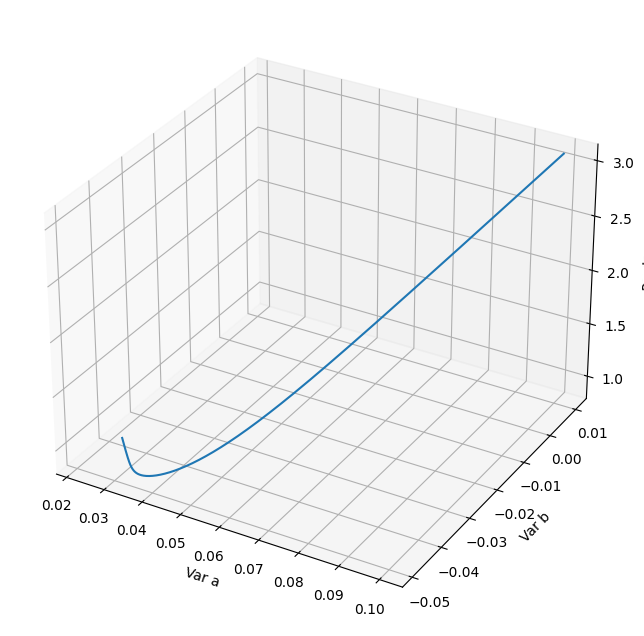

In [216]:
# Plotando os valores de A , B e a perda
plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')

ax.plot3D(var_a, var_b, perdas)
ax.set_xlabel("Var a")
ax.set_ylabel("Var b")
ax.set_zlabel("Perdas")

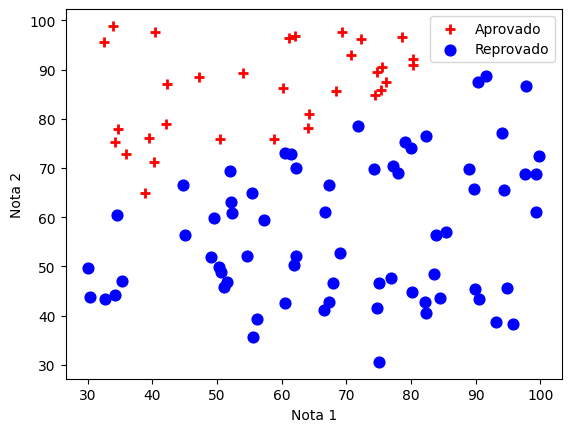

In [220]:
resultadoSigmoidal = np.where(Y_pred < 0.6, 1, 0)

def plotDataSig(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (resultadoSigmoidal == 0)
    pos = (resultadoSigmoidal == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='r', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='b', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)

plotDataSig(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')